In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data
ads = pd.read_excel("sample_data.xlsx", sheet_name=0, header=1)
ads.head()

p_date             ad_id delivery_country queue_market  punish_num  \
0  20230807  1747578422390810               US         USCA         1.0   
1  20230807  1758543228094480               SA         MENA         1.0   
2  20230807  1738303151826990               AU           AU         2.0   
3  20230807  1738303920938010               NZ           NZ         2.0   
4  20230807  1738304016410620               NZ           NZ         2.0   

  latest_punish_begin_date  ad_revenue  avg_ad_revenue          start_time  \
0               2023-07-24   5132.1700        4795.250 2022-10-24 14:36:00   
1               2023-06-14   1976.2500        1063.767 2023-02-22 15:50:00   
2               2023-07-24      1.7355           5.365 2022-07-14 05:00:00   
3               2023-07-24         NaN           5.365 2022-07-14 05:16:00   
4               2023-07-24      1.5250           5.365 2022-07-14 05:17:00   

   baseline_st product_line              task_type_en  
0         1.78  Auction Ads          auction_relation  
1         1.67          RIE  Ad Group Recall (Merged)  
2         1.84  Auction Ads          auction_relation  
3         1.58  Auction Ads          auction_relation  
4         1.58  Auction Ads          auction_relation

In [9]:
ads['punish_num'] = ads['punish_num'].fillna(0)
ads['ad_revenue'].fillna(ads['avg_ad_revenue'], inplace=True)
# ?
ads['start_time'].fillna(ads['latest_punish_begin_date'], inplace=True)

In [10]:
missing_values = ads.isna().sum()
print(missing_values)

p_date                          0
ad_id                           0
delivery_country                0
queue_market                21155
punish_num                      0
latest_punish_begin_date        0
ad_revenue                      0
avg_ad_revenue                  0
start_time                      0
baseline_st                     0
product_line                    0
task_type_en                    0
dtype: int64


In [11]:
ads['p_date'] = pd.to_datetime(ads['p_date'], format='%Y%m%d')  # You may need to specify the format if it's not in YYYYMMDD format
ads['start_time'] = pd.to_datetime(ads['start_time'], format='%Y%m%d')

ads['date_difference_bet_start_date'] = np.abs((ads['p_date'] - ads['start_time']).dt.days )
ads['date_difference_bet_punish_date'] = (ads['p_date'] - ads['latest_punish_begin_date']).dt.days

In [12]:
ads.describe()

ad_id    punish_num    ad_revenue  avg_ad_revenue   baseline_st  \
count  4.067900e+04  40679.000000  40679.000000    40679.000000  40679.000000   
mean   1.772982e+15      0.067086     58.626704       23.887703      1.206670   
std    2.562183e+12      0.337079    430.908998      187.580436      0.659845   
min    1.697828e+15      0.000000      0.000000        0.000000      0.540000   
25%    1.773396e+15      0.000000      0.810100        0.835250      0.540000   
50%    1.773532e+15      0.000000      3.750000        2.597900      1.400000   
75%    1.773564e+15      0.000000     14.469250        8.269100      1.780000   
max    1.773617e+15     16.000000  27100.620000    17144.498600      7.590000   

       date_difference_bet_start_date  date_difference_bet_punish_date  
count                    40679.000000                     40679.000000  
mean                      1392.165442                      8113.368200  
std                       3163.252682                      2022.510702  
min                          0.000000                         0.000000  
25%                          1.000000                      8619.000000  
50%                          1.000000                      8619.000000  
75%                         10.000000                      8619.000000  
max                       8619.000000                      8619.000000

                                 punish_num  avg_ad_revenue  ad_revenue  \
punish_num                         1.000000       -0.006130   -0.004147   
avg_ad_revenue                    -0.006130        1.000000    0.595603   
ad_revenue                        -0.004147        0.595603    1.000000   
baseline_st                        0.159030        0.108312    0.109442   
date_difference_bet_start_date    -0.086819       -0.051785   -0.056918   
date_difference_bet_punish_date   -0.795954        0.007237    0.010768   

                                 baseline_st  date_difference_bet_start_date  \
punish_num                          0.159030                       -0.086819   
avg_ad_revenue                      0.108312                       -0.051785   
ad_revenue                          0.109442                       -0.056918   
baseline_st                         1.000000                       -0.441079   
date_difference_bet_start_date     -0.441079                        1.0000

/var/folders/g_/44btdrxd0rz29dfp753v0k8r0000gn/T/ipykernel_54093/1761411550.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ads[['punish_num', 'latest_punish_begin_date','avg_ad_revenue','ad_revenue','baseline_st', 'date_difference_bet_start_date','date_difference_bet_punish_date']].corr()


<AxesSubplot: >

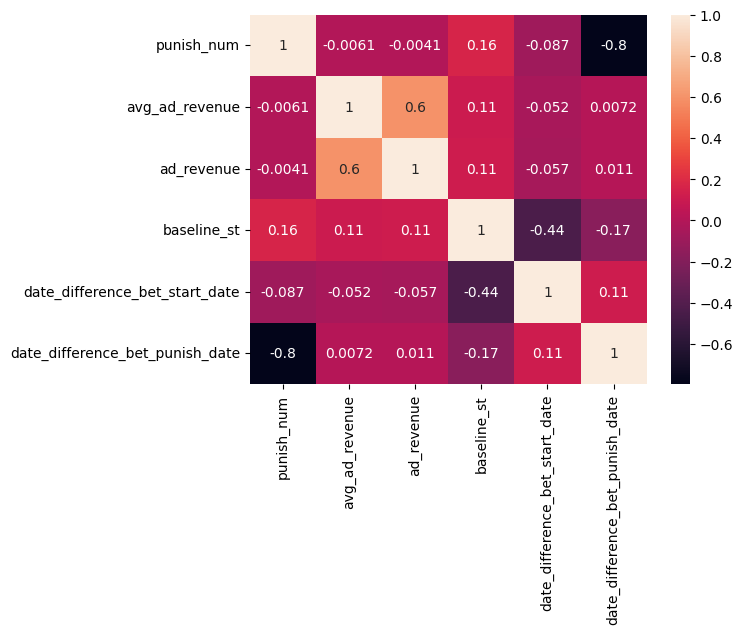

In [135]:
correlation_matrix = ads[['punish_num', 'latest_punish_begin_date','avg_ad_revenue','ad_revenue','baseline_st', 'date_difference_bet_start_date','date_difference_bet_punish_date']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns.values, yticklabels=correlation_matrix.columns.values, annot = True, annot_kws={'size':10})
# would it be concerning for punish num and date_difference_bet_punish_date  to have such a high negative correlation?

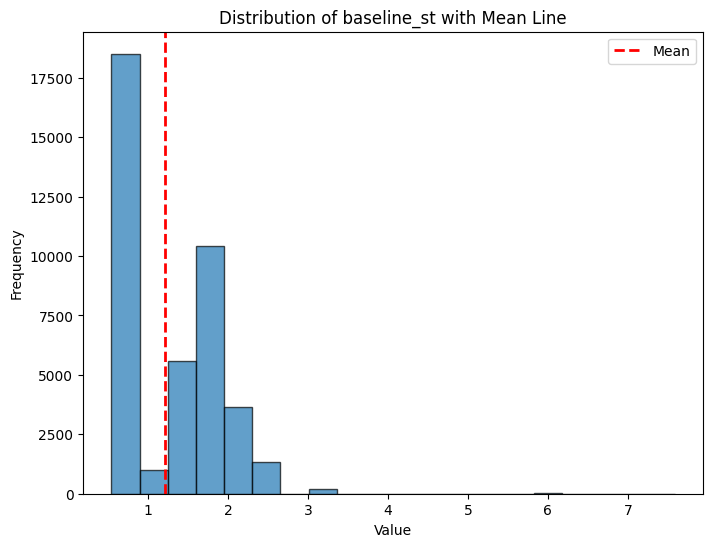

In [121]:
plt.figure(figsize=(8, 6))
plt.hist(ads['baseline_st'], bins=20, edgecolor='k', alpha=0.7)  # Add alpha for transparency
plt.axvline(ads['baseline_st'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Distribution of baseline_st with Mean Line')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()  # Add legend to label the Mean line
plt.show()

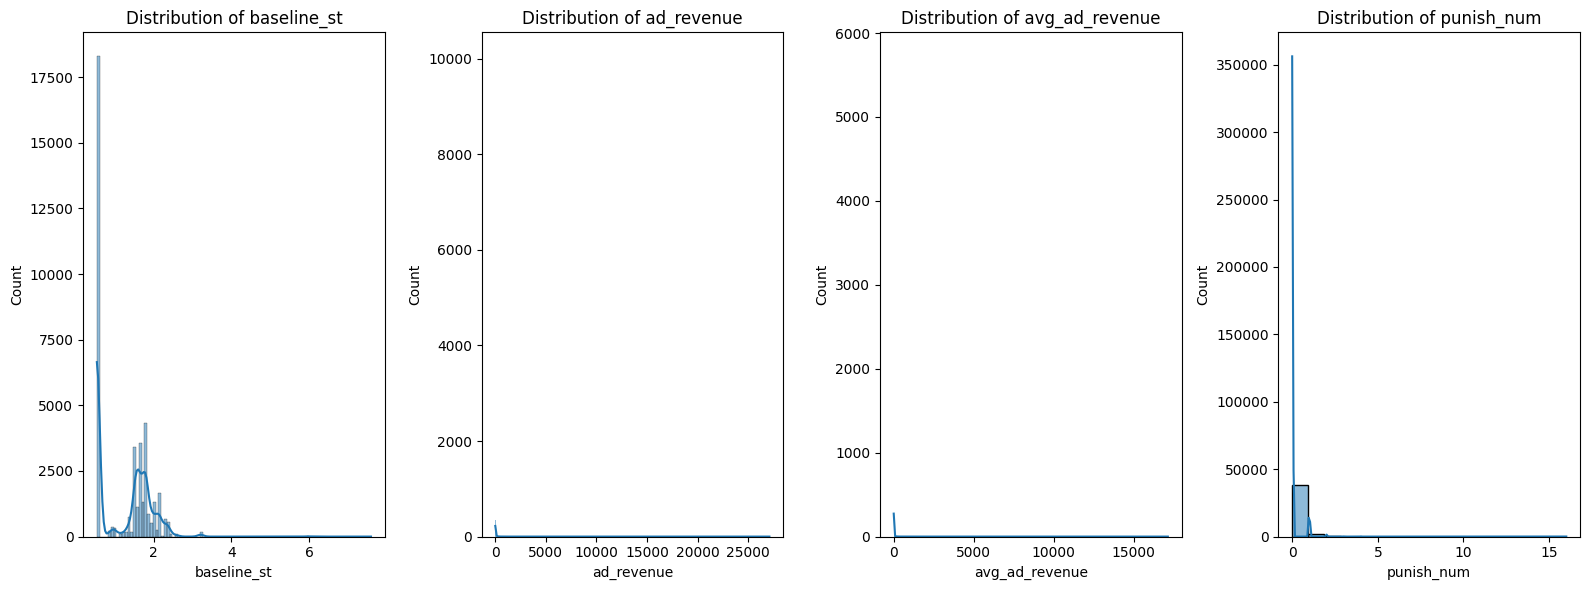

In [132]:

# List of numerical columns to visualize
numerical_columns = ['baseline_st', 'ad_revenue', 'avg_ad_revenue','punish_num']

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(16, 6))

# If you have only one column, you don't need to flatten the axes
# Loop through each numerical column and create a distribution plot
for i, column in enumerate(numerical_columns):
    sns.histplot(ads[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()

plt.show()


In [19]:
ads[ads['baseline_st'] == 0.54]

p_date             ad_id delivery_country queue_market  punish_num  \
322   2023-08-07  1772993446242300               PT          NaN         1.0   
325   2023-08-07  1773011982034940               RO          NaN         1.0   
380   2023-08-07  1773171876882430               MY          NaN         1.0   
381   2023-08-07  1773171876882430               MY          NaN         1.0   
382   2023-08-07  1773194571416570               SA          NaN         1.0   
...          ...               ...              ...          ...         ...   
40674 2023-08-07  1773472206047230               VN          NaN         0.0   
40675 2023-08-07  1773607712030720               BR          NaN         0.0   
40676 2023-08-07  1773589699308540               BE          NaN         0.0   
40677 2023-08-07  1773530511220730               TR          NaN         0.0   
40678 2023-08-07  1773608138524670               BR          NaN         0.0   

      latest_punish_begin_date  ad_revenue  avg_ad_revenue  \
322                 2023-07-14      2.1015          2.3399   
325                 2023-07-26      0.7434          0.6874   
380                 2023-06-25      5.1131          3.4041   
381                 2023-06-25      5.1131          3.4041   
382                 2023-07-20      0.0000          1.1415   
...                        ...         ...             ...   
40674               2000-01-01      0.0000          0.0000   
40675               2000-01-01      0.0000          0.0000   
40676               2000-01-01      0.0000          0.0000   
40677               2000-01-01      0.0000          0.0000   
40678               2000-01-01      0.0000          0.0000   

               start_time  baseline_st     product_line task_type_en  \
322   2023-08-01 02:52:00         0.54  Non-Auction Ads      Promote   
325   2023-08-01 07:49:00         0.54  Non-Auction Ads      Promote   
380   2023-08-03 02:08:00         0.54  Non-Auction Ads      Promote   
381   2023-08-03 02:08:00         0.54  Non-Auction Ads      Promote   
382   2023-08-03 08:09:00         0.54  Non-Auction Ads      Promote   
...                   ...          ...              ...          ...   
40674 2000-01-01 00:00:00         0.54  Non-Auction Ads      Promote   
40675 2000-01-01 00:00:00         0.54  Non-Auction Ads      Promote   
40676 2000-01-01 00:00:00         0.54  Non-Auction Ads      Promote   
40677 2000-01-01 00:00:00         0.54  Non-Auction Ads      Promote   
40678 2000-01-01 00:00:00         0.54  Non-Auction Ads      Promote   

       date_difference_bet_start_date  date_difference_bet_punish_date  
322                                 5                               24  
325                                 5                               12  
380                                 3                               43  
381                                 3                               43  
382                                 3                               18  
...                               ...                              ...  
40674                            8619                             8619  
40675                            8619                             8619  
40676                            8619                             8619  
40677                            8619                             8619  
40678                            8619                             8619  

[18291 rows x 14 columns]

In [29]:
used = ads[['punish_num','ad_revenue','avg_ad_revenue','baseline_st', 'date_difference_bet_start_date','date_difference_bet_punish_date']]

In [30]:
used.describe()

punish_num    ad_revenue  avg_ad_revenue   baseline_st  \
count  40679.000000  40679.000000    40679.000000  40679.000000   
mean       0.067086     58.626704       23.887703      1.206670   
std        0.337079    430.908998      187.580436      0.659845   
min        0.000000      0.000000        0.000000      0.540000   
25%        0.000000      0.810100        0.835250      0.540000   
50%        0.000000      3.750000        2.597900      1.400000   
75%        0.000000     14.469250        8.269100      1.780000   
max       16.000000  27100.620000    17144.498600      7.590000   

       date_difference_bet_start_date  date_difference_bet_punish_date  
count                    40679.000000                     40679.000000  
mean                      1392.165442                      8113.368200  
std                       3163.252682                      2022.510702  
min                          0.000000                         0.000000  
25%                          1.000000                      8619.000000  
50%                          1.000000                      8619.000000  
75%                         10.000000                      8619.000000  
max                       8619.000000                      8619.000000

In [125]:
used.columns

Index(['punish_num', 'avg_ad_revenue', 'baseline_st',
       'date_difference_bet_start_date', 'date_difference_bet_punish_date'],
      dtype='object')

In [31]:
# standarisation
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

used[['punish_num_scaled', 'avg_ad_revenue_scaled', 'ad_revenue_scaled','baseline_st_scaled', 'date_diff_bet_start_date_scaled', 'date_difference_bet_punish_date_scaled']] = scaler.fit_transform(used[['punish_num', 'avg_ad_revenue', 'ad_revenue', 'baseline_st',
       'date_difference_bet_start_date', 'date_difference_bet_punish_date']])

used.describe()

/var/folders/g8/_l0bjxc513vbb_ynt5jjdzqh0000gn/T/ipykernel_94146/3035711038.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used[['punish_num_scaled', 'avg_ad_revenue_scaled', 'ad_revenue_scaled','baseline_st_scaled', 'date_diff_bet_start_date_scaled', 'date_difference_bet_punish_date_scaled']] = scaler.fit_transform(used[['punish_num', 'avg_ad_revenue', 'ad_revenue', 'baseline_st',
/var/folders/g8/_l0bjxc513vbb_ynt5jjdzqh0000gn/T/ipykernel_94146/3035711038.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

punish_num    ad_revenue  avg_ad_revenue   baseline_st  \
count  40679.000000  40679.000000    40679.000000  40679.000000   
mean       0.067086     58.626704       23.887703      1.206670   
std        0.337079    430.908998      187.580436      0.659845   
min        0.000000      0.000000        0.000000      0.540000   
25%        0.000000      0.810100        0.835250      0.540000   
50%        0.000000      3.750000        2.597900      1.400000   
75%        0.000000     14.469250        8.269100      1.780000   
max       16.000000  27100.620000    17144.498600      7.590000   

       date_difference_bet_start_date  date_difference_bet_punish_date  \
count                    40679.000000                     40679.000000   
mean                      1392.165442                      8113.368200   
std                       3163.252682                      2022.510702   
min                          0.000000                         0.000000   
25%                          1.000000                      8619.000000   
50%                          1.000000                      8619.000000   
75%                         10.000000                      8619.000000   
max                       8619.000000                      8619.000000   

       punish_num_scaled  avg_ad_revenue_scaled  ad_revenue_scaled  \
count       4.067900e+04           4.067900e+04       4.067900e+04   
mean       -6.047614e-14          -1.199549e-15      -4.506601e-15   
std         1.000012e+00           1.000012e+00       1.000012e+00   
min        -1.990248e-01          -1.273480e-01      -1.360552e-01   
25%        -1.990248e-01          -1.228952e-01      -1.341752e-01   
50%        -1.990248e-01          -1.134983e-01      -1.273526e-01   
75%        -1.990248e-01          -8.326452e-02      -1.024764e-01   
max         4.726820e+01           9.127189e+01       6.275647e+01   

       baseline_st_scaled  date_diff_bet_start_date_scaled  \
count        4.067900e+04                     4.067900e+04   
mean        -2.631467e-14                     2.195407e-13   
std          1.000012e+00                     1.000012e+00   
min         -1.010355e+00                    -4.401111e-01   
25%         -1.010355e+00                    -4.397949e-01   
50%          2.929969e-01                    -4.397949e-01   
75%          8.688965e-01                    -4.369497e-01   
max          9.674099e+00                     2.284649e+00   

       date_difference_bet_punish_date_scaled  
count                            4.067900e+04  
mean                            -8.013314e-14  
std                              1.000012e+00  
min                             -4.011582e+00  
25%                              2.500051e-01  
50%                              2.500051e-01  
75%                              2.500051e-01  
max                              2.500051e-01

In [32]:
df2 = used[['punish_num_scaled', 'avg_ad_revenue_scaled', 'ad_revenue_scaled', 'baseline_st_scaled', 'date_diff_bet_start_date_scaled', 'date_difference_bet_punish_date_scaled']]


df2['risk'] = 0.6*df2['punish_num_scaled'] + 0.4 * df2['date_difference_bet_punish_date_scaled']
df2['profitability'] = 0.4*df2['avg_ad_revenue_scaled'] + 0.6*df2['ad_revenue_scaled']
df2['urgency'] = - df2['date_diff_bet_start_date_scaled'] #the less days given, the more urgent
df2['complexity'] = df2['baseline_st_scaled']


df2.describe()


/var/folders/g8/_l0bjxc513vbb_ynt5jjdzqh0000gn/T/ipykernel_94146/198557538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['risk'] = 0.6*df2['punish_num_scaled'] + 0.4 * df2['date_difference_bet_punish_date_scaled']
/var/folders/g8/_l0bjxc513vbb_ynt5jjdzqh0000gn/T/ipykernel_94146/198557538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['profitability'] = 0.4*df2['avg_ad_revenue_scaled'] + 0.6*df2['ad_revenue_scaled']
/var/folders/g8/_l0bjxc513vbb_ynt5jjdzqh0000gn/T/ipykernel_94146/198557538

punish_num_scaled  avg_ad_revenue_scaled  ad_revenue_scaled  \
count       4.067900e+04           4.067900e+04       4.067900e+04   
mean       -6.047614e-14          -1.199549e-15      -4.506601e-15   
std         1.000012e+00           1.000012e+00       1.000012e+00   
min        -1.990248e-01          -1.273480e-01      -1.360552e-01   
25%        -1.990248e-01          -1.228952e-01      -1.341752e-01   
50%        -1.990248e-01          -1.134983e-01      -1.273526e-01   
75%        -1.990248e-01          -8.326452e-02      -1.024764e-01   
max         4.726820e+01           9.127189e+01       6.275647e+01   

       baseline_st_scaled  date_diff_bet_start_date_scaled  \
count        4.067900e+04                     4.067900e+04   
mean        -2.631467e-14                     2.195407e-13   
std          1.000012e+00                     1.000012e+00   
min         -1.010355e+00                    -4.401111e-01   
25%         -1.010355e+00                    -4.397949e-01   
50%          2.929969e-01                    -4.397949e-01   
75%          8.688965e-01                    -4.369497e-01   
max          9.674099e+00                     2.284649e+00   

       date_difference_bet_punish_date_scaled          risk  profitability  \
count                            4.067900e+04  4.067900e+04   4.067900e+04   
mean                            -8.013314e-14 -1.369095e-14   1.125687e-15   
std                              1.000012e+00  3.714103e-01   8.977245e-01   
min                             -4.011582e+00 -1.941281e-02  -1.325723e-01   
25%                              2.500051e-01 -1.941281e-02  -1.288774e-01   
50%                              2.500051e-01 -1.941281e-02  -1.199633e-01   
75%                              2.500051e-01 -1.941281e-02  -9.222569e-02   
max                              2.500051e-01  2.676301e+01   7.416264e+01   

            urgency    complexity  
count  4.067900e+04  4.067900e+04  
mean  -2.195407e-13 -2.631467e-14  
std    1.000012e+00  1.000012e+00  
min   -2.284649e+00 -1.010355e+00  
25%    4.369497e-01 -1.010355e+00  
50%    4.397949e-01  2.929969e-01  
75%    4.397949e-01  8.688965e-01  
max    4.401111e-01  9.674099e+00

In [26]:
def min_max_scale(col):
    min_score = min(df2[col])
    max_score = df2[col].quantile(0.99)
    df2[col] = df2[col].apply(lambda x: min((x-min_score)/(max_score-min_score), 1.0))

# min_max_scale("risk")
# min_max_scale("profitability")
# min_max_scale("complexity")
# min_max_scale("urgency")


# df2.describe()

In [34]:
### adjust beta here 

beta0 = 0.35 # for risk
beta1 = 0.35 # for profitability
beta2 = 0.15 # for priority
beta3 = 0.15 # for complexity


# calculating score
df2['ads_score'] = (
   beta0 * df2['risk'] +
   beta1 * df2['profitability'] +
   beta2 * df2['urgency'] +
   beta3 * df2['complexity']
)

# Print the DataFrame with the predicted scores
print(df2[['ads_score']])


       ads_score
0       6.237062
1       1.897519
2       0.793609
3       0.736272
4       0.734400
...          ...
40674  -0.547445
40675  -0.547445
40676  -0.547445
40677  -0.547445
40678  -0.547445

[40679 rows x 1 columns]


/var/folders/g8/_l0bjxc513vbb_ynt5jjdzqh0000gn/T/ipykernel_94146/1090768210.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ads_score'] = (


In [35]:
df2[['ads_score']].describe()

ads_score
count  4.067900e+04
mean  -1.132657e-15
std    4.488317e-01
min   -5.474455e-01
25%   -1.373504e-01
50%    8.660487e-02
75%    1.609009e-01
max    2.615282e+01

In [36]:
df2[['ads_score']].quantile(0.99)

ads_score    1.14873
Name: 0.99, dtype: float64

/var/folders/g8/_l0bjxc513vbb_ynt5jjdzqh0000gn/T/ipykernel_94146/616410948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = df2[col].apply(lambda x: min((x-min_score)/(max_score-min_score), 1.0))


<AxesSubplot:xlabel='ads_score', ylabel='Count'>

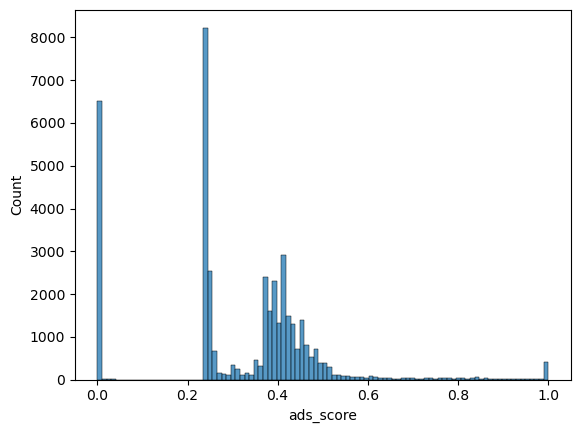

In [37]:
min_max_scale("ads_score")

sns.histplot(df2['ads_score'])

In [42]:
df2[df2['ads_score'] < 0.2].shape[0] / len(df2)

0.1607709137392758

In [39]:
df2['ads_score'].describe()

count    40679.000000
mean         0.314636
std          0.183389
min          0.000000
25%          0.241776
50%          0.373812
75%          0.417614
max          1.000000
Name: ads_score, dtype: float64